In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv('./input/FINAL_USO.csv')

df.corr()

Open      High       Low     Close  Adj Close    Volume  \
Open           1.000000  0.999515  0.999442  0.998976   0.998976  0.251921   
High           0.999515  1.000000  0.999262  0.999535   0.999535  0.261064   
Low            0.999442  0.999262  1.000000  0.999532   0.999532  0.237031   
Close          0.998976  0.999535  0.999532  1.000000   1.000000  0.246778   
Adj Close      0.998976  0.999535  0.999532  1.000000   1.000000  0.246778   
...                 ...       ...       ...       ...        ...       ...   
USO_High       0.634864  0.637208  0.633623  0.635311   0.635311  0.083064   
USO_Low        0.634277  0.636538  0.633140  0.634732   0.634732  0.080475   
USO_Close      0.635138  0.637483  0.633994  0.635675   0.635675  0.081642   
USO_Adj Close  0.635138  0.637483  0.633994  0.635675   0.635675  0.081642   
USO_Volume    -0.455920 -0.454913 -0.457628 -0.456193  -0.456193  0.069580   

                SP_open   SP_high    SP_low  SP_close  ...   GDX_Low  \
Open          -0.684314 -0.684597 -0.683464 -0.683998  ...  0.975479   
High          -0.688118 -0.688365 -0.687325 -0.687817  ...  0.975650   
Low           -0.680911 -0.681242 -0.679988 -0.680567  ...  0.975337   
Close         -0.684618 -0.684904 -0.683750 -0.684284  ...  0.975561   
Adj Close     -0.684618 -0.684904 -0.683750 -0.684284  ...  0.975561   
...                 ...       ...       ...       ...  ...       ...   
USO_High      -0.774626 -0.775482 -0.773550 -0.774799  ...  0.614587   
USO_Low       -0.771235 -0.772154 -0.770087 -0.771396  ...  0.613844   
USO_Close     -0.773099 -0.773957 -0.771928 -0.773159  ...  0.614733   
USO_Adj Close -0.773099 -0.773957 -0.771928 -0.773159  ...  0.614733   
USO_Volume     0.375568  0.377996  0.371390  0.374658  ... -0.429839   

               GDX_Close  GDX_Adj Close  GDX_Volume  USO_Open  USO_High  \
Open            0.974596       0.974098   -0.514230  0.634872  0.634864   
High            0.975341       0.974746   -0.508782  0.637101  0.637208   
Low             0.974568       0.974182   -0.519988  0.633591  0.633623   
Close           0.975459       0.974980   -0.514616  0.635197  0.635311   
Adj Close       0.975459       0.974980   -0.514616  0.635197  0.635311   
...                  ...            ...         ...       ...       ...   
USO_High        0.614766       0.600523   -0.522581  0.999857  1.000000   
USO_Low         0.613931       0.599819   -0.523956  0.999848  0.999818   
USO_Close       0.614915       0.600756   -0.523801  0.999699  0.999867   
USO_Adj Close   0.614915       0.600756   -0.523801  0.999699  0.999867   
USO_Volume     -0.426553      -0.421065    0.498816 -0.699000 -0.695678   

                USO_Low  USO_Close  USO_Adj Close  USO_Volume  
Open           0.634277   0.635138       0.635138   -0.455920  
High           0.636538   0.637483       0.637483   -0.454913  
Low            0.633140   0.633994       0.633994   -0.457628  
Close          0.634732   0.635675       0.635675   -0.456193  
Adj Close      0.634732   0.635675       0.635675   -0.456193  
...                 ...        ...            ...         ...  
USO_High       0.999818   0.999867       0.999867   -0.695678  
USO_Low        1.000000   0.999879       0.999879   -0.702665  
USO_Close      0.999879   1.000000       1.000000   -0.699221  
USO_Adj Close  0.999879   1.000000       1.000000   -0.699221  
USO_Volume    -0.702665  -0.699221      -0.699221    1.000000  

[80 rows x 80 columns]

In [7]:
import seaborn as sns
import plotly.graph_objects as go

plot_columns = df.drop('Date', axis=1).columns

#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(plot_columns)).as_hex())

fig = go.Figure()
for d,p in zip(plot_columns, pal):
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df[d],
                             name = d,
                             line_color = p, 
                             fill=None))   #tozeroy 

fig.show()

In [17]:
dfi = df.set_index('Date')

test_size = int(0.3 * len(dfi))
train_size = len(dfi) - test_size
print(test_size, train_size)

training_x = dfi[:train_size]
testing_x = dfi[train_size:].drop(['Adj Close','Close'], axis=1)
testing_y = dfi[train_size:].drop('Close',axis=1)['Adj Close'].values

515 1203


In [26]:
import joblib
from sklearn.pipeline import Pipeline

def save_pipeline(*, pipeline_to_persist: Pipeline) -> None:
    """Persist the pipeline.
    Saves the versioned model, and overwrites any previous
    saved models. This ensures that when the package is
    published, there is only one trained model that can be
    called, and we know exactly how it was built.
    """
    
    # Prepare versioned save file name
    save_file_name = f"test_01.pkl"
    save_path = "./"+ save_file_name

    # remove_old_pipelines(files_to_keep=[save_file_name])
    joblib.dump(pipeline_to_persist, save_path)

In [31]:
from sklearn.linear_model import Ridge #능형회귀
best_model = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1858, solver='auto', tol=0.001)
      
best_model_fit = best_model.fit(training_x.drop(['Adj Close','Close'], axis=1), training_x['Adj Close'])
best_model_predict = list(best_model_fit.predict(testing_x))

print(best_model_predict[:5])
save_pipeline(pipeline_to_persist=best_model_fit)

[111.24311346726996, 111.24298671473994, 112.03517323066411, 111.53762078550986, 110.16783609158303]


c:\Users\User\anaconda3\envs\sklearn1.1\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.

c:\Users\User\anaconda3\envs\sklearn1.1\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning:

Ill-conditioned matrix (rcond=1.82474e-19): result may not be accurate.



In [29]:
def load_pipeline(*, file_name: str) -> Pipeline:
    """Load a persisted pipeline."""

    file_path = './'+ file_name
    trained_model = joblib.load(filename=file_path)
    return trained_model

In [30]:
_fraud_detection_pipe = load_pipeline(file_name="test_01.pkl")

predictions = _fraud_detection_pipe.predict(X=testing_x)
print(predictions[:5])



[111.24311347 111.24298671 112.03517323 111.53762079 110.16783609]


In [20]:
import pandas as pd

results_df = pd.DataFrame()
results_df['Predictions'] = best_model_predict
results_df['Actual'] = testing_y

display(results_df)

Predictions      Actual
0     111.243113  111.540001
1     111.242987  111.430000
2     112.035173  111.830002
3     111.537621  111.570000
4     110.167836  110.400002
..           ...         ...
510   120.025895  120.019997
511   119.123981  119.660004
512   120.208630  120.570000
513   120.620206  121.059998
514   120.932745  121.250000

[515 rows x 2 columns]

In [21]:
plot_columns = results_df.columns

#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(plot_columns)).as_hex())

fig = go.Figure()
for d,p in zip(plot_columns, pal):
    fig.add_trace(go.Scatter(x = testing_x.index,
                             y = results_df[d],
                             name = d,
                             line_color = p, 
                             fill=None))   #tozeroy 

fig.show()

<AxesSubplot:xlabel='coefs', ylabel='cols'>

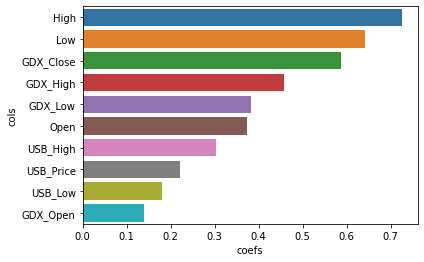

In [22]:
coefs = list(abs(best_model.coef_))
cols = list(training_x.drop(['Close','Adj Close'], axis=1).columns)

var_importance = pd.DataFrame()
var_importance['cols'] = cols
var_importance['coefs'] = coefs

var_importance = var_importance.sort_values('coefs', ascending=False)[:10]

sns.barplot(x='coefs', y='cols', data=var_importance)